In [5]:
from model.model import *
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns


In [6]:

grid_spacing=20
N=1000
discharge_rate=0
CP_loc='inputs\CP_locs.csv'
CP_loc='random'
POIs = 'inputs/POIs.csv'
model = EVSpaceModel(CP_loc=CP_loc,discharge_rate=discharge_rate,N=N,grid_spacing=grid_spacing,POIs=POIs)
model.run_model(100)   

In [7]:
model.POIs.sort_values('prob')

,x,y,prob,uses
id,,,,
15,5.455762,4.358445,0.000875,3
20,1.502885,6.924813,0.007296,16
7,5.285696,4.557749,0.032490,52
4,0.360683,9.448444,0.034677,61
10,2.852958,0.686836,0.035697,73
3,2.414514,7.465355,0.035813,78
1,2.339485,0.020599,0.055561,102
14,2.291096,5.203197,0.068257,155
17,3.107945,4.680120,0.110836,214


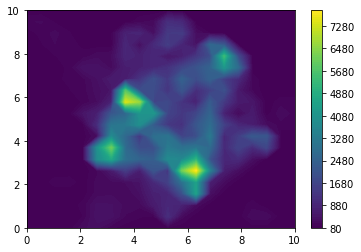

In [8]:
GP = model.datacollector_gridpoints.get_agent_vars_dataframe()
# XY = pd.DataFrame(GP['pos'].tolist()).rename({0:'X',1:'Y'},axis=1)


GP_tot = GP.reset_index().groupby('AgentID').agg({'cars_passing':sum,'X':'first','Y':'first'})
# fig, ax = plt.subplots()
# sns.scatterplot(data=GP_tot, x='X',y='Y',c=GP_tot['cars_passing'])

X = GP_tot['X'].values.reshape((-1,grid_spacing))
Y = GP_tot['Y'].values.reshape((-1,grid_spacing))
Z = GP_tot['cars_passing'].values.reshape((-1,grid_spacing))

fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cs = ax.contourf(X, Y, Z, 100)
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cbar = plt.colorbar(cs)